In [9]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
import math 

In [10]:
df = pd.read_csv(r"/work/telco.csv")

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape 

(7043, 21)

Checking for Nulls and Imputing 

In [13]:
df.isna().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.describe() 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
df.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
#Discrepancy 1 - Nulls are written as " ". Since only 11 rows out of 7k, drop these rows
df[df.TotalCharges == ' '].shape 

(11, 21)

In [62]:
df = df[df.TotalCharges != ' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [18]:
df.corr() 

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.015683,0.219874
tenure,0.015683,1.000000,0.246862
MonthlyCharges,0.219874,0.246862,1.000000


### Univariate Data Analysis

In [19]:
df.columns 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

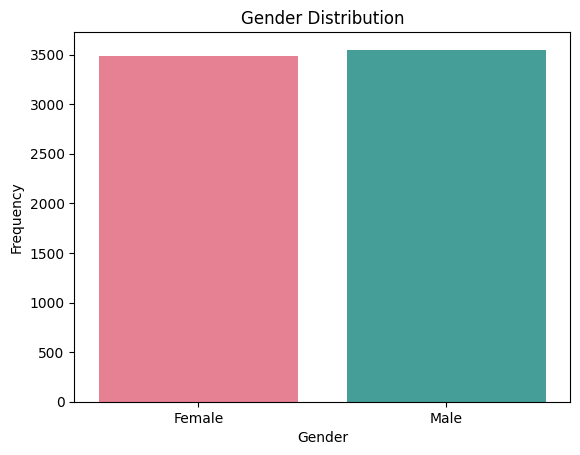

In [20]:
sns.countplot(data = df, x = "gender", palette = 'husl')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution')
plt.show()

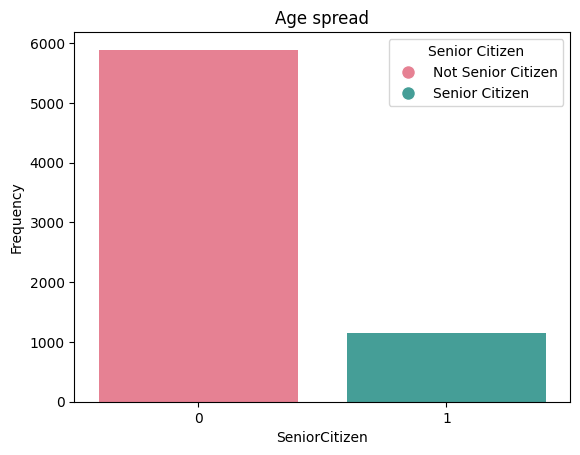

In [21]:
ax = sns.countplot(data=df, x="SeniorCitizen", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]

legend_labels = ['Not Senior Citizen', 'Senior Citizen']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
                   for label, color in zip(legend_labels, bar_colors)]
plt.legend(handles=legend_elements, title='Senior Citizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency')
plt.title('Age spread')
plt.show()
 

/tmp/ipykernel_84/2564097415.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x="tenure", kde=True, palette='husl' , bins=30)


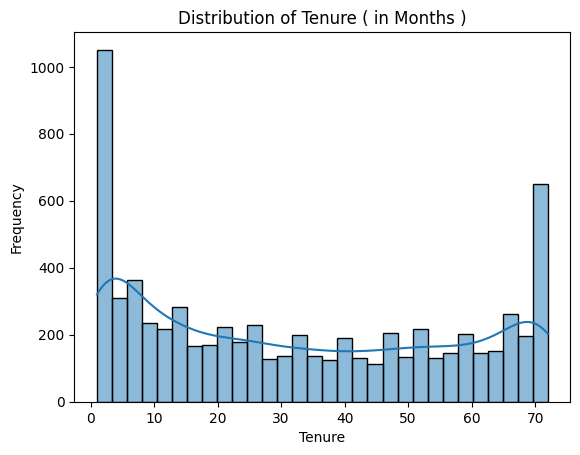

In [22]:
sns.histplot(data=df, x="tenure", kde=True, palette='husl' , bins=30)
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure ( in Months )')
plt.show() 

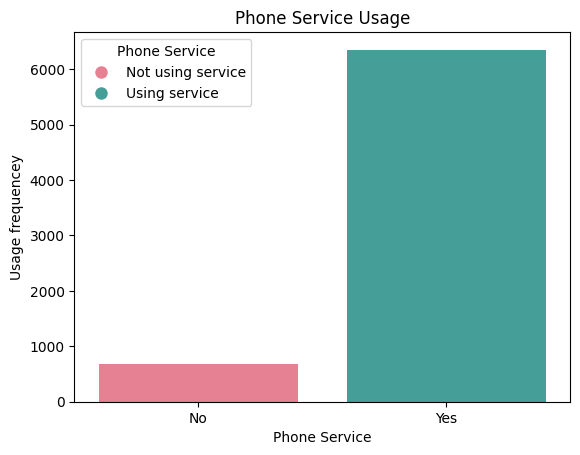

In [23]:
ax = sns.countplot(data=df, x="PhoneService", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]

legend_labels = ['Not using service', 'Using service']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
                   for label, color in zip(legend_labels, bar_colors)]
plt.legend(handles=legend_elements, title='Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Usage frequencey')
plt.title('Phone Service Usage') 
plt.show()
 

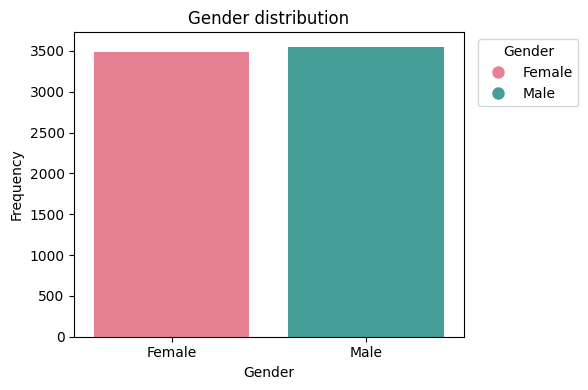

In [25]:
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
ax = sns.countplot(data=df, x="gender", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
legend_labels = ['Female', 'Male']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
                   for label, color in zip(legend_labels, bar_colors)]
plt.legend(handles=legend_elements, title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender distribution')
plt.tight_layout()  # Adjust the layout to prevent overlapping
plt.show() 

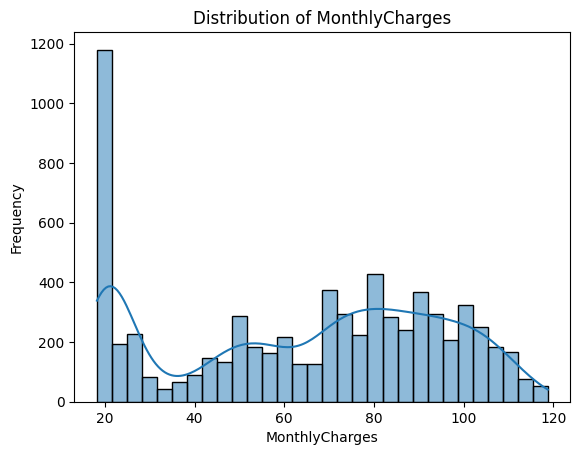

In [27]:
sns.histplot(data=df, x="MonthlyCharges", kde=True , bins=30)
plt.xlabel('MonthlyCharges') 
plt.ylabel('Frequency')
plt.title('Distribution of MonthlyCharges') 
plt.show() 

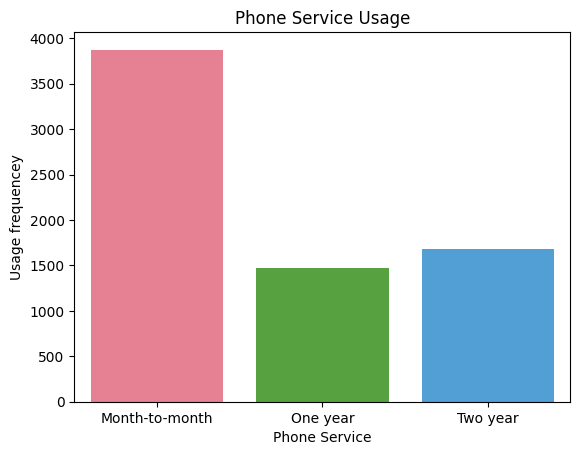

In [28]:
ax = sns.countplot(data=df, x="Contract", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('Phone Service') 
plt.ylabel('Usage frequencey')
plt.title('Phone Service Usage') 
plt.show()

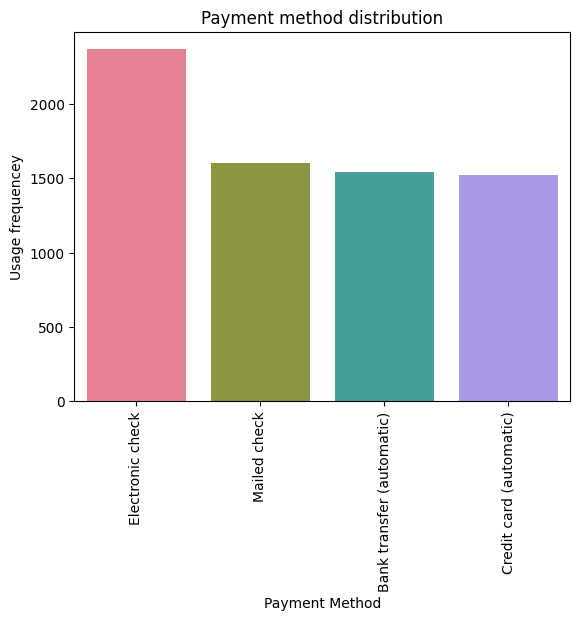

In [29]:
ax = sns.countplot(data=df, x="PaymentMethod", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('Payment Method')  
plt.ylabel('Usage frequencey')
plt.title('Payment method distribution') 
plt.xticks(rotation = 90)  
plt.show()

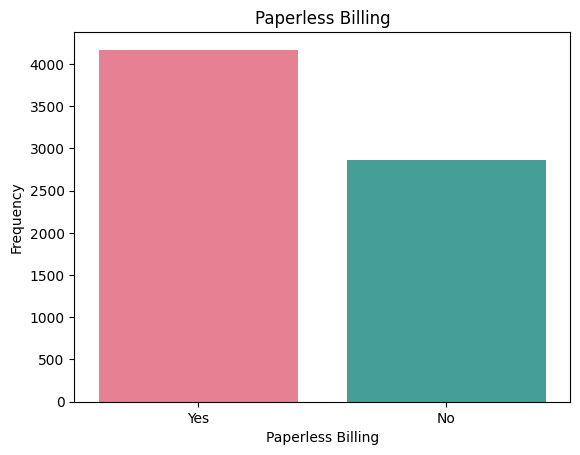

In [30]:
ax = sns.countplot(data=df, x="PaperlessBilling", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('Paperless Billing')   
plt.ylabel('Frequency')
plt.title('Paperless Billing')
plt.show()

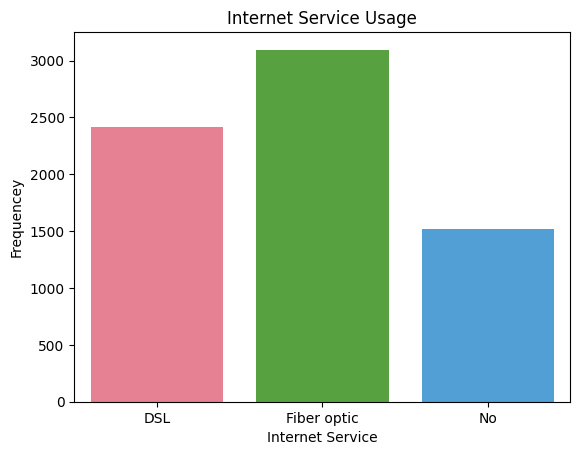

In [31]:
ax = sns.countplot(data=df, x="InternetService", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('Internet Service') 
plt.ylabel('Frequencey')
plt.title('Internet Service Usage') 
plt.show()

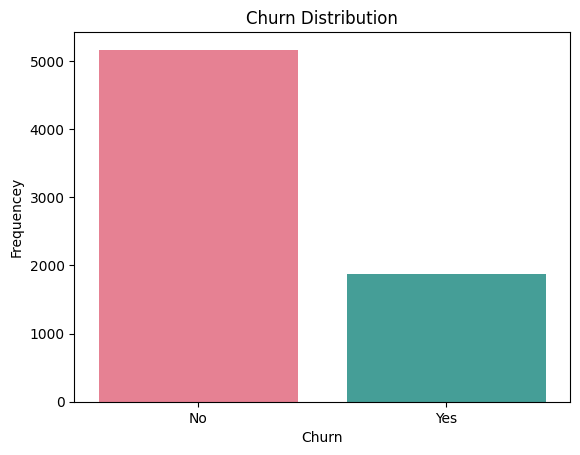

In [32]:
ax = sns.countplot(data=df, x="Churn", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('Churn') 
plt.ylabel('Frequencey')
plt.title('Churn Distribution') 
plt.show() 

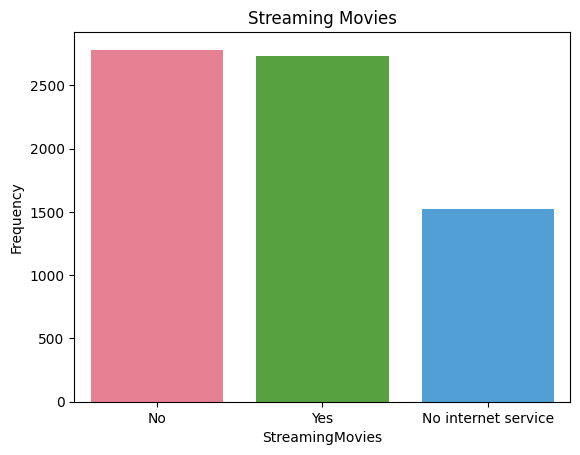

In [33]:
ax = sns.countplot(data=df, x="StreamingMovies", palette='husl')
bar_colors = [patch.get_facecolor() for patch in ax.patches]
plt.xlabel('StreamingMovies') 
plt.ylabel('Frequency')
plt.title('Streaming Movies') 
plt.show()

In [34]:
# Removing redundant classes
df.loc[df.StreamingMovies == 'No internet service', 'StreamingMovies'] = 'No'
df.loc[df.StreamingTV == 'No internet service', 'StreamingTV'] = 'No'
df.loc[df.TechSupport == 'No internet service', 'TechSupport'] = 'No'
df.loc[df.DeviceProtection == 'No internet service', 'DeviceProtection'] = 'No'

### Bivariate Data Analysis

In [56]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['green','salmon'])
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False) 

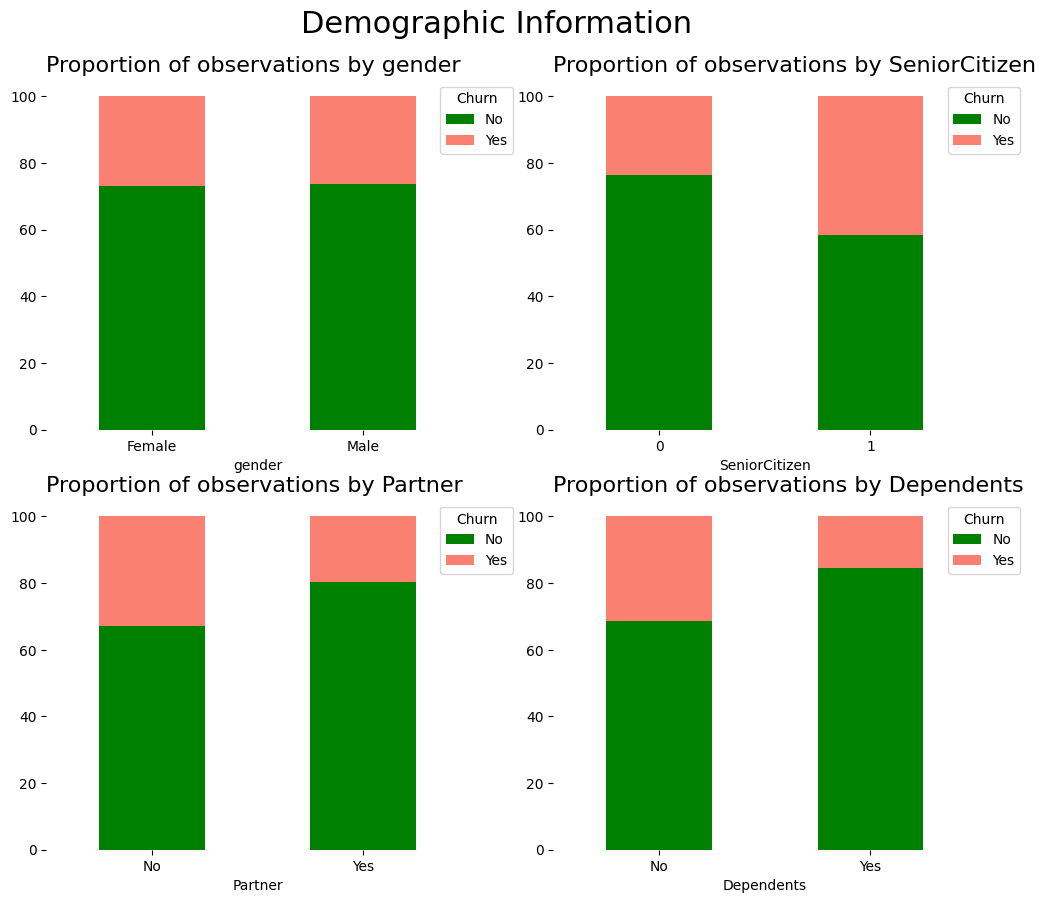

In [57]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information') 

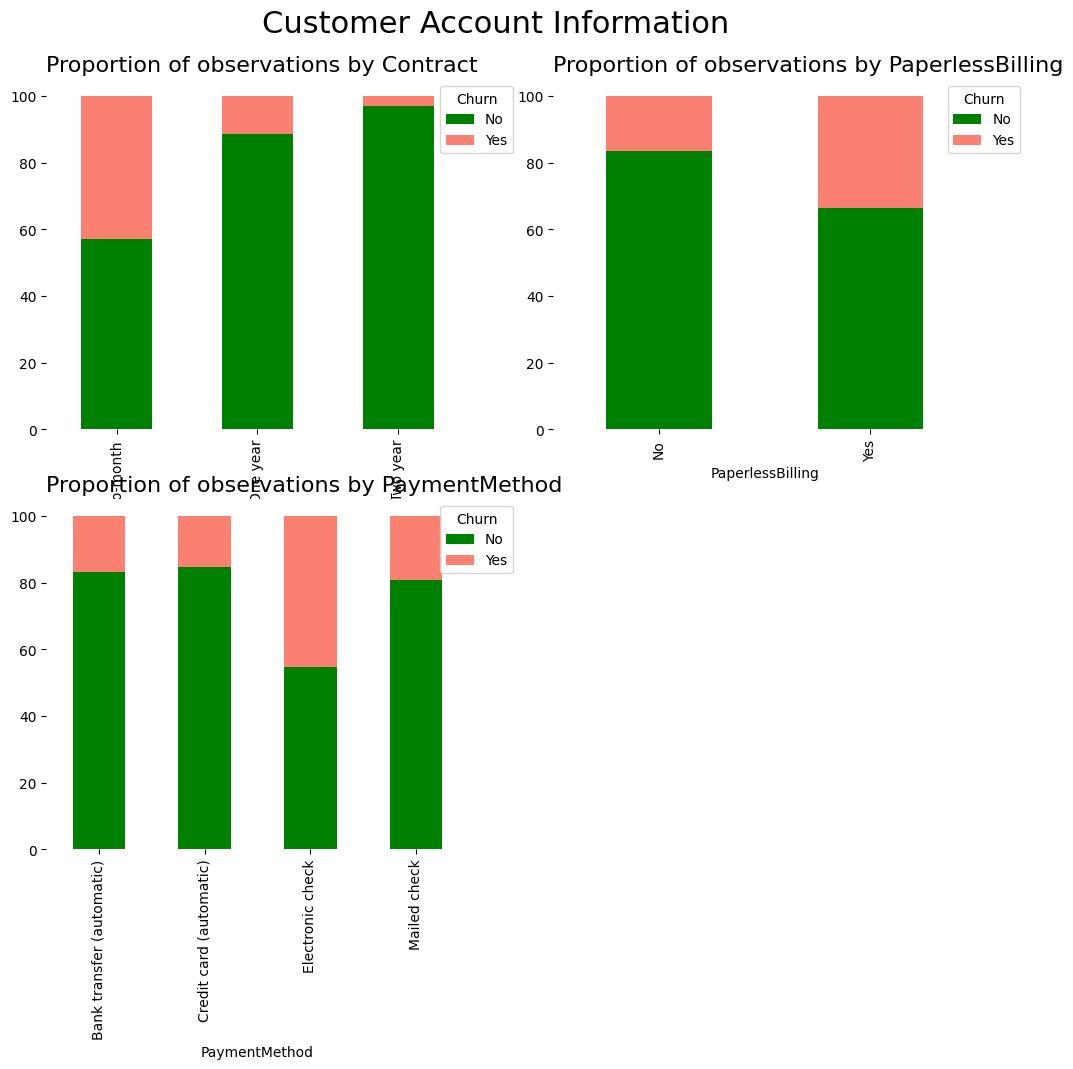

In [51]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information') 

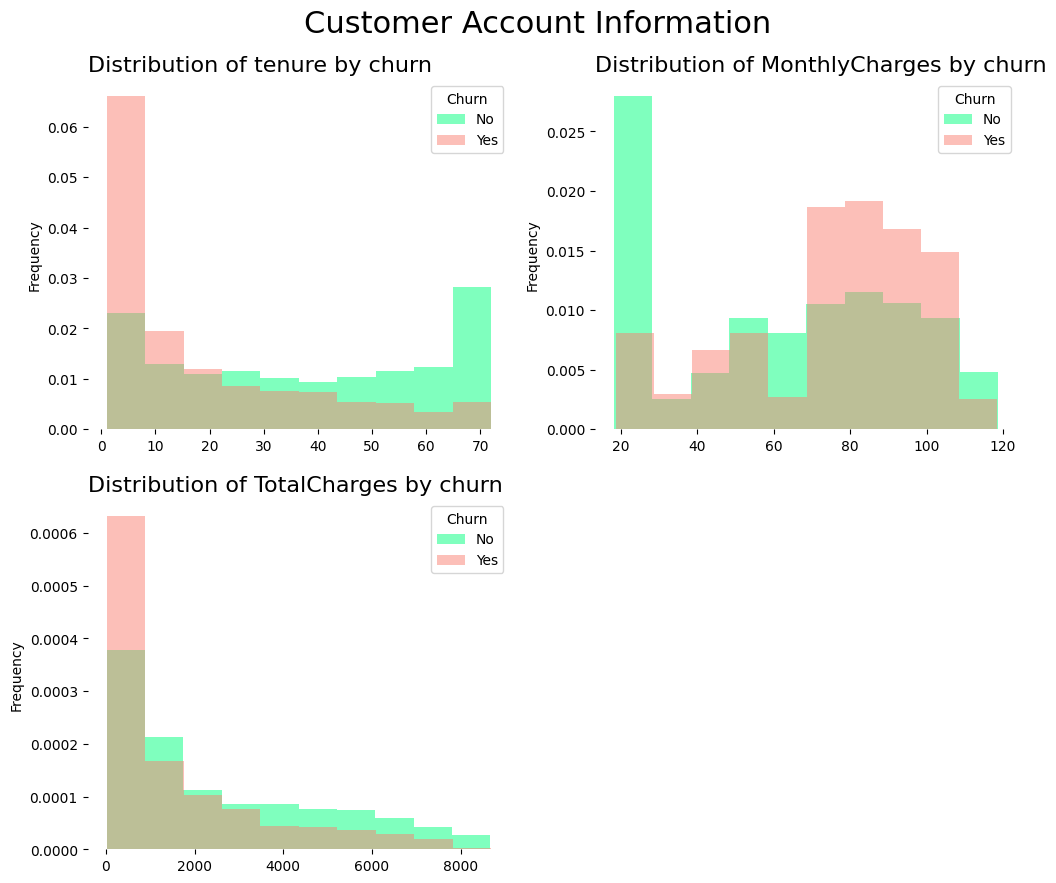

In [65]:
def histogram_plots(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
histogram_plots(account_columns_numeric, 'Customer Account Information')

In [66]:
df.to_csv(r'/work/modellingData.csv') 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ec3842c2-c382-455d-93f8-dece0100b701' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>